<h2>Phase Kickback</h2>

[Watch Lecture](https://youtu.be/7H7A9IRPc8s)

We observe another interesting quantum effect here.

We apply a Controlled-NOT operator, but the controller qubit will be affected!

<h3> Task 1</h3>

Create a quantum circuit with two qubits, say $ q[1] $ and $ q[0] $ in the reading order of Qiskit.

We start in quantum state $ \ket{01} $:
- set the state of $ q[1] $ to $ \ket{0} $, and
- set the state of $ q[0] $ to $ \ket{1} $.

Apply Hadamard to both qubits.

Apply CNOT operator, where the controller qubit is $ q[1] $ and the target qubit is $ q[0] $.

Apply Hadamard to both qubits.

Measure the outcomes.

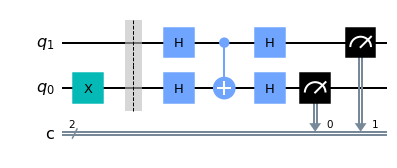

{'11': 100}


In [1]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
#
# your code is here
#
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

q =  QuantumRegister(2,"q") # quantum register with 2 qubits
c = ClassicalRegister(2,"c") # classical register with 2 bits

qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

# the up qubit is in |0>

# set the down qubit to |1>
qc.x(q[0]) # apply x-gate (NOT operator)

qc.barrier()

# apply Hadamard to both qubits.
qc.h(q[0])
qc.h(q[1])

# apply CNOT operator, where the controller qubit is the up qubit and the target qubit is the down qubit.
qc.cx(1,0)

# apply Hadamard to both qubits.
qc.h(q[0])
qc.h(q[1])

# measure both qubits
qc.measure(q,c)

# draw the circuit in Qiskit reading order
display(qc.draw(output='mpl',reverse_bits=True))

# execute the circuit 100 times in the local simulator
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)

<h3> The effect of CNOT </h3>

The quantum state of the up qubit before CNOT:

$$
    \ket{0} \xrightarrow{H} \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1}.
$$

The quantum state of the down qubit before CNOT:

$$
    \ket{1} \xrightarrow{H} \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}.
$$

The quantum state of the composite system:

$$
   \mypar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} } 
   \otimes
   \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
$$

CNOT affects when the up qubit has the value 1.

Let's rewrite the composite state as below to explicitly represent the effect of CNOT.

$$
     \frac{1}{\sqrt{2}} \ket{0} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
     +
     \frac{1}{\sqrt{2}} \ket{1} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
$$

CNOT flips the state of the down qubit.

After CNOT, we have:

$$
     \frac{1}{\sqrt{2}} \ket{0} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
     +
     \frac{1}{\sqrt{2}} \ket{1} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{1} - \frac{1}{\sqrt{2}} \ket{0}  }
$$

Remark that $\ket{0}$ and $ \ket{1} $ are swapped in the second qubit.

If we write the quantum state of the down qubit as before, the sign of $ \ket{1} $ in the up qubit should be flipped.

Thus the last equation can be equivalently written as follows:

$$
     \frac{1}{\sqrt{2}} \ket{0} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
     -
     \frac{1}{\sqrt{2}} \ket{1} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
$$

Before CNOT operator, the sign of $ \ket{1} $ in the up qubit is positive. 
    
After CNOT operator, its sign changes to negative.

This is called <b>phase kickback</b>.

<h3> After CNOT </h3>

It is easy to see from the last expression, that the quantum states of the qubits are separable (no correlation):

$$
   \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1} } 
   \otimes
   \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
$$

If we apply Hadamard to each qubit, both qubits evolve to state $ \ket{1} $.

The final state is $ \ket{11} $.

<h3> Task 2 </h3>

Create a circuit  with 7 qubits, say $ q[6],\ldots,q[0] $ in the reading order of Qiskit.

Set the states of the top six qubits to $ \ket{0} $.

Set the state of the bottom qubit to $ \ket{1} $.

Apply Hadamard operators to all qubits.

Apply CNOT operator ($q[1]$,$q[0]$) 
<br>
Apply CNOT operator ($q[4]$,$q[0]$) 
<br>
Apply CNOT operator ($q[5]$,$q[0]$) 

Apply Hadamard operators to all qubits.

Measure all qubits. 

For each CNOT operator, is there a phase-kickback effect?

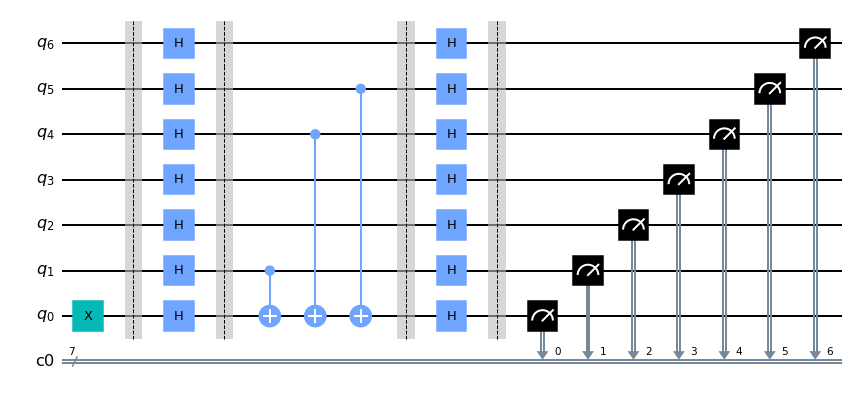

{'0110011': 100}


In [2]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
#
# your code is here
#
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# Create a circuit with 7 qubits.
q =  QuantumRegister(7,"q") # quantum register with 7 qubits
c = ClassicalRegister(7) # classical register with 7 bits

qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

# the top six qubits are already in |0>

# set the bottom qubit to |1>
qc.x(0) # apply x-gate (NOT operator)

# define a barrier
qc.barrier()

# apply Hadamard to all qubits.
for i in range(7):
    qc.h(q[i])

    # define a barrier
qc.barrier()


# apply CNOT operator (q[1],q[0]) 
# apply CNOT operator (q[4],q[0]) 
# apply CNOT operator (q[5],q[0]) 
qc.cx(q[1],q[0])
qc.cx(q[4],q[0])
qc.cx(q[5],q[0])

# define a barrier
qc.barrier()


# apply Hadamard to all qubits.
for i in range(7):
    qc.h(q[i])

# define a barrier
qc.barrier()

# measure all qubits
qc.measure(q,c)

# draw the circuit in Qiskit reading order
display(qc.draw(output='mpl',reverse_bits=True))

# execute the circuit 100 times in the local simulator
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)